# Convolutional Autoencoder

Implementation of Convolutional Autoencoder. 

reference: https://github.com/udacity/deep-learning/blob/master/autoencoder/Convolutional_Autoencoder_Solution.ipynb

### Importing MNIST dataset

In [3]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', validation_size=0)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


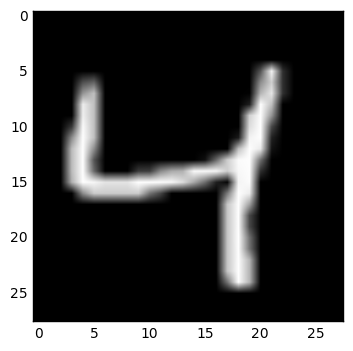

In [3]:
img = mnist.train.images[2]
plt.imshow(img.reshape((28, 28)), cmap='Greys_r')
plt.show()

### implementaion architecture
below is the Autoencoder architecture I will implement. 
The image is from [udacity github](https://github.com/udacity/deep-learning/blob/master/autoencoder/assets/convolutional_autoencoder.png) 

![conv arch](./assets/convolutional_autoencoder.png)

## Implement the Autoencoder

First, define some handy functions for cnn. 

In [1]:
def weight_variable(shape):
    """
    initializes weight. 
    
    :parm shape: a 4-D tensor of shape 
            [filter_height, filter_width, in_channels, out_channels]
    :return: tensor variable 
    """
    initial = tf.truncated_normal(shape=shape, stddev=0.1)
    return tf.Variable(initial)

def bias_variable(shape):
    """
    initializes bias. 
    
    :parm shape: shape of bias 
    :return: tensor variable 
    """
    initial = tf.constant(shape=shape, value=0.1)
    return tf.Variable(initial)

def conv2d(x, W):
    return tf.nn.conv2d(input=x, 
                        filter=W, 
                        strides=[1, 1, 1, 1], 
                        padding="SAME")

def max_pool_2x2(x):
    return tf.nn.max_pool(value=x, 
                          ksize=[1, 2, 2, 1],
                          strides=[1, 2, 2, 1], 
                          padding="SAME")

Defining input and output 

In [5]:
x = tf.placeholder(dtype=tf.float32, 
                   shape=[None, 28, 28, 1], 
                   name="input")
y_ = tf.placeholder(dtype=tf.float32, 
                    shape=[None, 28, 28, 1], 
                    name="output")

Defining encoder

In [6]:
# first conv layer 
# 28 x 28 x 16
weight1 = weight_variable(shape=[5, 5, 1, 16])
bias1 = bias_variable(shape=[16])
h_conv1 = tf.nn.relu(conv2d(x, weight1) + bias1)

# max pooling 
# 14 x 14 x 16
h_pool1 = max_pool_2x2(h_conv1)

# second conv layer
# 14 x 14 x 8
weight2 = weight_variable(shape=[5, 5, 16, 8])
bias2 = bias_variable(shape=[8])
h_conv2 = tf.nn.relu(conv2d(h_pool1, weight2) + bias2)

# max pooling 
# 7 x 7 x 8
h_pool2 = max_pool_2x2(h_conv2)

# third conv layer 
# 7 x 7 x 8 
weight3 = weight_variable(shape=[5, 5, 8, 8])
bias3 = bias_variable(shape=[8])
h_conv3 = tf.nn.relu(conv2d(h_pool2, weight3) + bias3)

# max pooling 
# 4 x 4 x 8
encoded = max_pool_2x2(h_conv3)

Defining decoder

In [7]:
# upsampling 
# 7 x 7 x 8 
upsample1 = tf.image.resize_nearest_neighbor(images=encoded, size=(7, 7))

# fourth conv layer 
# 7 x 7 x 8
weight4 = weight_variable(shape=[5, 5, 8, 8])
bias4 = bias_variable(shape=[8])
h_conv4 = tf.nn.relu(conv2d(upsample1, weight4) + bias4)

# upsampling 
# 14 x 14 x 8 
upsample2 = tf.image.resize_nearest_neighbor(images=h_conv4, size=(14, 14))

# fifth conv layer
# 14 x 14 x 8
weight5 = weight_variable(shape=[5, 5, 8, 8])
bias5 = bias_variable(shape=[8])
h_conv5 = tf.nn.relu(conv2d(upsample2, weight5) + bias5)

# upsampling
# 28 x 28 x 8
upsample3 = tf.image.resize_nearest_neighbor(images=h_conv5, size=(28, 28))

# sixth conv layer 
# 28 x 28 x 16
weight6 = weight_variable(shape=[5, 5, 8, 16])
bias6 = bias_variable(shape=[16])
h_conv6 = tf.nn.relu(conv2d(upsample3, weight6) + bias6)

# seventh conv layer 
weight7 = weight_variable(shape=[5, 5, 16 , 1])
bias7 = bias_variable(shape=[1])
logit = conv2d(h_conv6, weight7) + bias7

decoded = tf.nn.sigmoid(logit)


Define loss and etc

In [16]:
loss = tf.nn.sigmoid_cross_entropy_with_logits(labels=y_, logits=logit)
cross_entropy = tf.reduce_mean(loss)
train_step = tf.train.AdamOptimizer(learning_rate=0.001).minimize(cross_entropy)

Train

In [17]:
sess = tf.Session()

In [20]:
epochs = 5
batch_size = 200

sess.run(tf.global_variables_initializer())
for e in range(epochs):
    for i in range(mnist.train.num_examples//batch_size):
        batch = mnist.train.next_batch(200)
        imgs = batch[0].reshape((-1, 28, 28, 1))
        batch_cost, _ = sess.run([cross_entropy, train_step], 
                                 feed_dict={x: imgs, y_: imgs})

        if i%10 == 0:
            print("epoch {0}/ loss: {1:.4f} ".format(e+1, batch_cost))


epoch 1/ loss: 0.7171 
epoch 1/ loss: 0.4194 
epoch 1/ loss: 0.3004 
epoch 1/ loss: 0.2598 
epoch 1/ loss: 0.2461 
epoch 1/ loss: 0.2345 
epoch 1/ loss: 0.2170 
epoch 1/ loss: 0.2168 
epoch 1/ loss: 0.2007 
epoch 1/ loss: 0.1955 
epoch 1/ loss: 0.1810 
epoch 1/ loss: 0.1784 
epoch 1/ loss: 0.1718 
epoch 1/ loss: 0.1644 
epoch 1/ loss: 0.1624 
epoch 1/ loss: 0.1550 
epoch 1/ loss: 0.1548 
epoch 1/ loss: 0.1583 
epoch 1/ loss: 0.1469 
epoch 1/ loss: 0.1419 
epoch 1/ loss: 0.1382 
epoch 1/ loss: 0.1396 
epoch 1/ loss: 0.1424 
epoch 1/ loss: 0.1407 
epoch 1/ loss: 0.1294 
epoch 1/ loss: 0.1341 
epoch 1/ loss: 0.1345 
epoch 1/ loss: 0.1293 
epoch 1/ loss: 0.1319 
epoch 1/ loss: 0.1291 
epoch 2/ loss: 0.1301 
epoch 2/ loss: 0.1244 
epoch 2/ loss: 0.1284 
epoch 2/ loss: 0.1269 
epoch 2/ loss: 0.1187 
epoch 2/ loss: 0.1201 
epoch 2/ loss: 0.1265 
epoch 2/ loss: 0.1238 
epoch 2/ loss: 0.1215 
epoch 2/ loss: 0.1240 
epoch 2/ loss: 0.1185 
epoch 2/ loss: 0.1219 
epoch 2/ loss: 0.1134 
epoch 2/ lo

Display how it works 

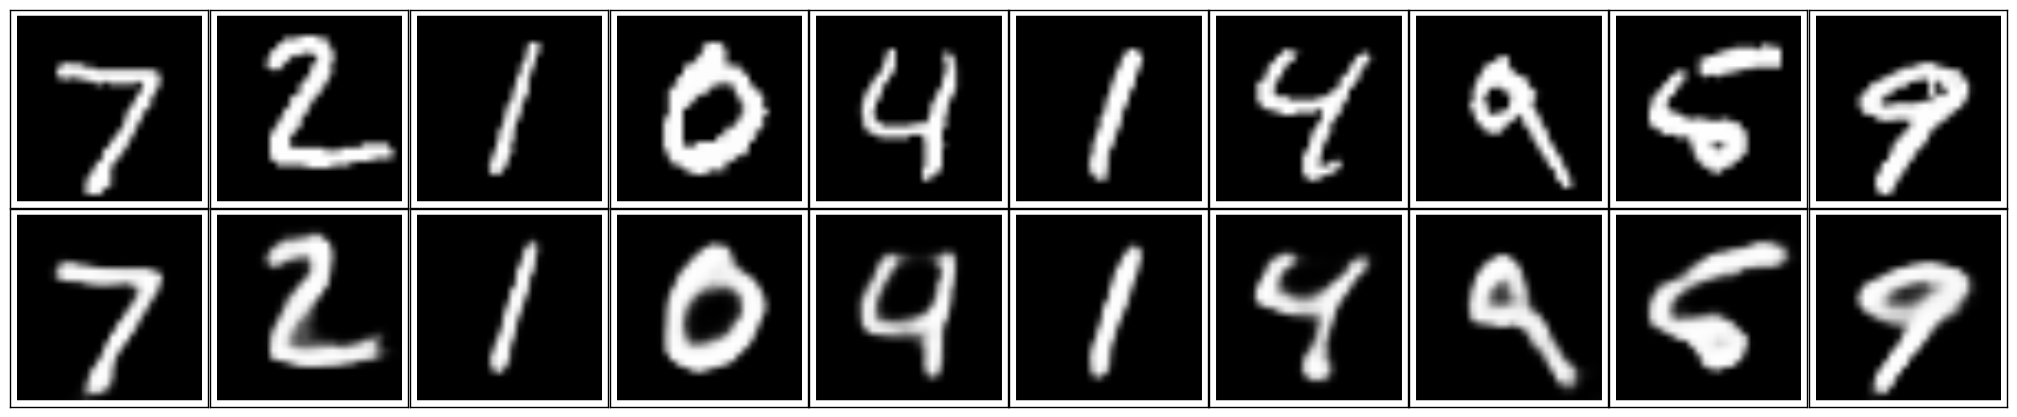

In [21]:
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))
in_imgs = mnist.test.images[:10]
reconstructed = sess.run(decoded, feed_dict={x: in_imgs.reshape((10, 28, 28, 1))})

for images, row in zip([in_imgs, reconstructed], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28, 28)), cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

fig.tight_layout(pad=0.1)
plt.show()

In [36]:
sess.close()

NameError: name 'sess' is not defined

## Denoising

how to create noisy images 

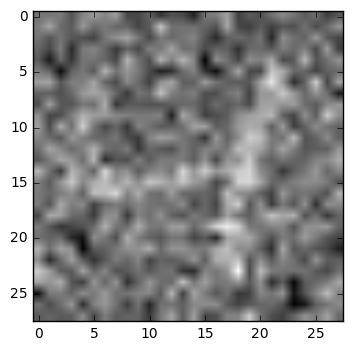

In [39]:
img = mnist.train.images[2].reshape((28, 28))
# generate random numbers shape of (28, 28)
noisy_img = img + 0.5 * np.random.randn(*img.shape)
# clip the image to be between 0 and 1
noise_img = np.clip(noisy_img, 0., 1.)
plt.imshow(noisy_img, cmap='Greys_r')
plt.show()

Defining input and output

In [8]:
x = tf.placeholder(dtype=tf.float32, 
                   shape=[None, 28, 28, 1])
y_ = tf.placeholder(dtype=tf.float32, 
                    shape=[None, 28, 28, 1])

Defining encoder

In [9]:
# first conv layer 
# 28 x 28 x 32
weight1 = weight_variable(shape=[5, 5, 1, 32])
bias1 = bias_variable(shape=[32])
h_conv1 = tf.nn.relu(conv2d(x, weight1) + bias1)

# max pooling 
# 14 x 14 x 32
h_pool1 = max_pool_2x2(h_conv1)

# second conv layer 
# 14 x 14 x 32 
weight2 = weight_variable(shape=[5, 5, 32, 32])
bias2 = bias_variable(shape=[32])
h_conv2 = tf.nn.relu(conv2d(h_pool1, weight2) + bias2)

# max pooling
# 7 x 7 x 32
h_pool2 = max_pool_2x2(h_conv2)

# third conv layer 
# 7 x 7 x 16
weight3 = weight_variable(shape=[5, 5, 32, 16])
bias3 = bias_variable(shape=[16])
h_conv3 = tf.nn.relu(conv2d(h_pool2, weight3) + bias3)

# max pooling 
# 4 x 4 x 16
encoded = max_pool_2x2(h_conv3)

Defining decoder

In [10]:
# upsampling 
# 7 x 7 x 16
upsample1 = tf.image.resize_nearest_neighbor(images=encoded, size=(7, 7))

# forth conv layer 
# 7 x 7 x 16
weight4 = weight_variable(shape=[5, 5, 16, 16])
bias4 = bias_variable(shape=[16])
h_conv4 = tf.nn.relu(conv2d(upsample1, weight4) + bias4)

# upsampling
# 14 x 14 x 16
upsample2 = tf.image.resize_nearest_neighbor(images=h_conv4, size=(14, 14))

# fifth conv layer 
# 14 x 14 x 32 
weight5 = weight_variable(shape=[5, 5, 16, 32])
bias5 = bias_variable(shape=[32])
h_conv5 = tf.nn.relu(conv2d(upsample2, weight5) + bias5)

# upsampling 
# 28 x 28 x 32
upsample3 = tf.image.resize_nearest_neighbor(images=h_conv5, size=(28, 28))

# sixth conv layer 
weight6 = weight_variable(shape=[5, 5, 32, 32])
bias6 = bias_variable(shape=[32])
h_conv6 = tf.nn.relu(conv2d(upsample3, weight6) + bias6)

# seventh conv layer 
weight7 = weight_variable(shape=[5, 5, 32, 1])
bias7 = bias_variable(shape=[1])
logit = conv2d(h_conv6, weight7) + bias7

decoded = tf.nn.sigmoid(logit)

Define loss and etc

In [35]:
loss = tf.nn.sigmoid_cross_entropy_with_logits(labels=y_, logits=logit)
cross_entropy = tf.reduce_mean(loss)
train_step = tf.train.AdamOptimizer(0.001).minimize(cross_entropy)

Train

In [37]:
sess = tf.Session()

In [41]:
epochs = 20
batch_size = 200
noise_factor = 0.5

sess.run(tf.global_variables_initializer())
for e in range(epochs):
    for i in range(mnist.train.num_examples//batch_size):
        batch = mnist.train.next_batch(200)
        imgs = batch[0].reshape((-1, 28, 28, 1))
        noisy_imgs = imgs + noise_factor * np.random.randn(*imgs.shape)
        noisy_imgs = np.clip(noisy_imgs, 0., 1.)
        batch_cost, _ = sess.run([cross_entropy, train_step], 
                                 feed_dict={x: noisy_imgs, y_: imgs})

        if i%10 == 0:
            print("epoch {0}/ loss: {1:.4f} ".format(e+1, batch_cost))

epoch 1/ loss: 1.2426 
epoch 1/ loss: 0.3443 
epoch 1/ loss: 0.3016 
epoch 1/ loss: 0.2727 
epoch 1/ loss: 0.2733 
epoch 1/ loss: 0.2639 
epoch 1/ loss: 0.2594 
epoch 1/ loss: 0.2530 
epoch 1/ loss: 0.2444 
epoch 1/ loss: 0.2373 
epoch 1/ loss: 0.2294 
epoch 1/ loss: 0.2275 
epoch 1/ loss: 0.2192 
epoch 1/ loss: 0.2123 
epoch 1/ loss: 0.2052 
epoch 1/ loss: 0.1999 
epoch 1/ loss: 0.1939 
epoch 1/ loss: 0.1964 
epoch 1/ loss: 0.1962 
epoch 1/ loss: 0.1913 
epoch 1/ loss: 0.1876 
epoch 1/ loss: 0.1856 
epoch 1/ loss: 0.1846 
epoch 1/ loss: 0.1811 
epoch 1/ loss: 0.1729 
epoch 1/ loss: 0.1771 
epoch 1/ loss: 0.1727 
epoch 1/ loss: 0.1696 
epoch 1/ loss: 0.1711 
epoch 1/ loss: 0.1702 
epoch 2/ loss: 0.1685 
epoch 2/ loss: 0.1695 
epoch 2/ loss: 0.1730 
epoch 2/ loss: 0.1733 
epoch 2/ loss: 0.1648 
epoch 2/ loss: 0.1649 
epoch 2/ loss: 0.1687 
epoch 2/ loss: 0.1574 
epoch 2/ loss: 0.1629 
epoch 2/ loss: 0.1655 
epoch 2/ loss: 0.1635 
epoch 2/ loss: 0.1550 
epoch 2/ loss: 0.1596 
epoch 2/ lo

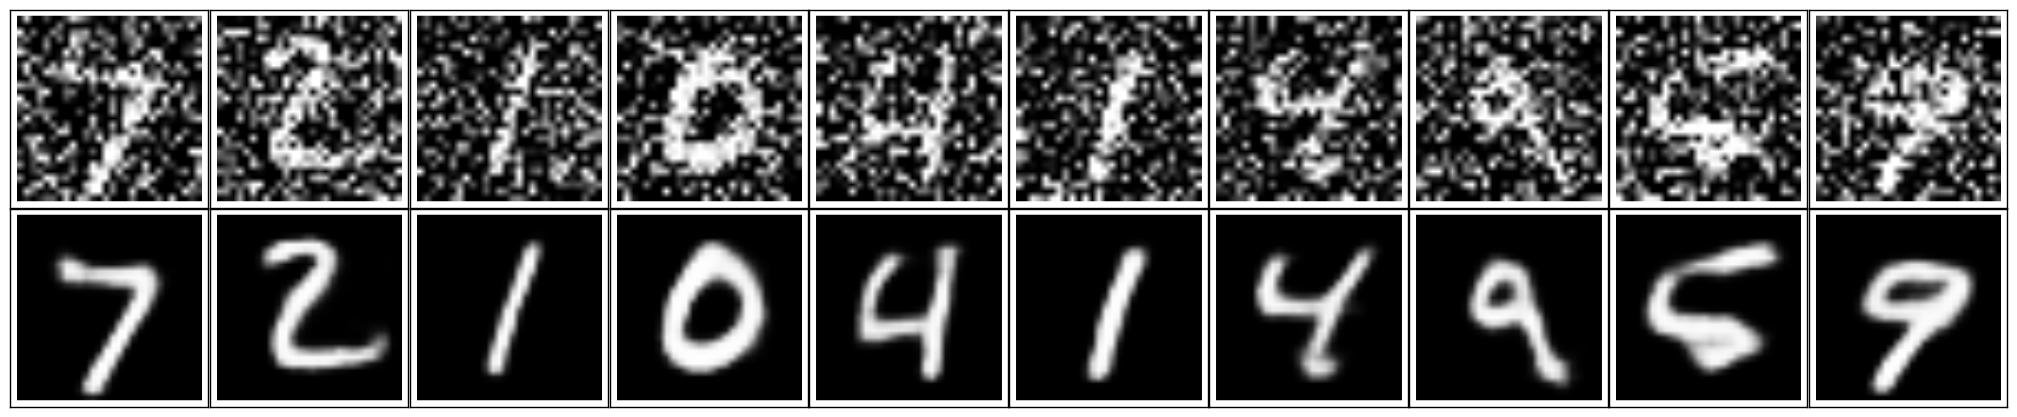

In [42]:
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))
in_imgs = mnist.test.images[:10]
noisy_imgs = in_imgs + noise_factor * np.random.randn(*in_imgs.shape)
noisy_imgs = np.clip(noisy_imgs, 0., 1.)

reconstructed = sess.run(decoded, feed_dict={x: noisy_imgs.reshape((10, 28, 28, 1))})

for images, row in zip([noisy_imgs, reconstructed], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28, 28)), cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

fig.tight_layout(pad=0.1)
plt.show()